In [31]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import warnings

Charting Voter Turnout and Spoiled/Rejected Votes

In [36]:
def choropleth_gradient(df=None, plot_for=('Malaysia'), v='spoiled_or_rejected_votes'):

    v_suffix = {'peratus_keluar': 'turnout',
                'spoiled_or_rejected_votes': 'spoiled or rejected votes'}

    v_title = {'peratus_keluar': 'Voter Turnout',
               'spoiled_or_rejected_votes': 'Spoiled or Rejected Votes (% of votes)'}

    cmaps = {'peratus_keluar': 'Blues',
             'spoiled_or_rejected_votes': 'Reds'}


    path_output = f'charts-{v_suffix[v]}'
    if not os.path.isdir(path_output):
        os.makedirs(path_output)

    for s in plot_for:
        print(s)
        geo = df.copy()
        title = ''
        suffix = ''
        if s != 'Malaysia':
            geo = geo[geo.state == s]
            title = f' in {s}'
            suffix = '_' + s.lower().replace(' ', '').replace('.', '')

        geo_s = geo.copy().dissolve(by='state')

        plt.rcParams.update({'font.size': 13,
                            'font.family': 'sans-serif',
                             'grid.linestyle': 'dotted',
                             'figure.figsize': [8, 8],
                             'figure.autolayout': True})
        fig, ax = plt.subplots()
        ax.axis('off')

        cmap = cmaps[v]
        lw = 1 if s != 'Malaysia' else 0.7
        vmin, vmax = geo[v].min(), geo[v].max()  # colours relative to specific range being plotted

        geo.plot(column=v, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.07, edgecolor='black', ax=ax)
        geo_s.plot(edgecolor='black', linewidth=lw, facecolor='none', ax=ax)
        if s != 'Malaysia':
            bbox_props = dict(boxstyle='round', fc="w", ec='0.5', alpha=0.5)
            geo.apply(lambda x: ax.annotate(text=x['seat'][6:],
                                            xy=x.geometry.centroid.coords[0],
                                            ha='center', va='center',
                                            size=9, bbox=bbox_props,
                                            wrap=True), axis=1)
        cbar_ax = fig.add_axes([0.1, 0.00, 0.8, 0.01])
        cbar = fig.colorbar(
            plt.cm.ScalarMappable(
                cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)
            ), cax=cbar_ax, orientation="horizontal")

        plt.suptitle(f'GE15: {v_title[v]} by Parliament{title}')
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            plt.savefig(f'{path_output}/choropleth_{v_suffix[v]}{suffix}.png',
                        bbox_inches='tight', pad_inches=0.2, dpi=400)
        plt.show()


In [33]:
df = pd.read_csv('data/results_parlimen_ge15.csv')
df['majoriti_peratus'] = df.majoriti/df.undi_keluar_peti * 100
df['spoiled_or_rejected_votes'] = (df['undi_rosak'] + df['undi_tolak']) / df['undi_dalam_peti']
geo_o = gpd.read_file('maps/parlimen.geojson')
geo_o.loc[~geo_o.code_state.isin([12, 13, 15]), 'geometry'] = geo_o.geometry.translate(9, 4.5)  # More compact Msia map
geo_o = pd.merge(geo_o, df,
                 left_on=['state', 'parlimen'],
                 right_on=['state', 'parlimen'], how='left')  # Merge with election results

In [34]:
choropleth_gradient(df=geo_o)

Malaysia


Malaysia


<Figure size 800x800 with 0 Axes>

c:\users\admin\desktop\km\analysis-election-msia\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


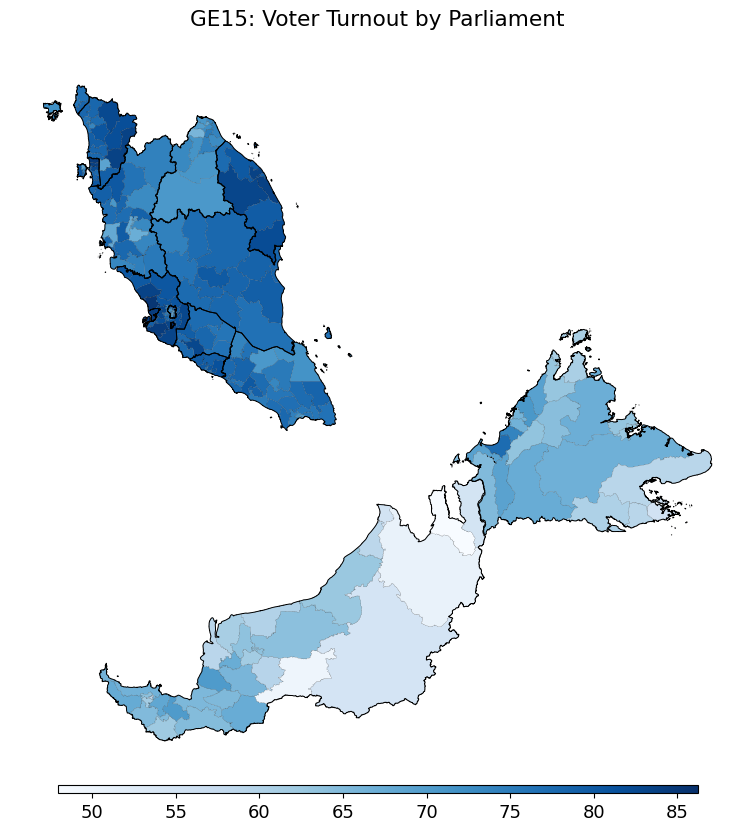

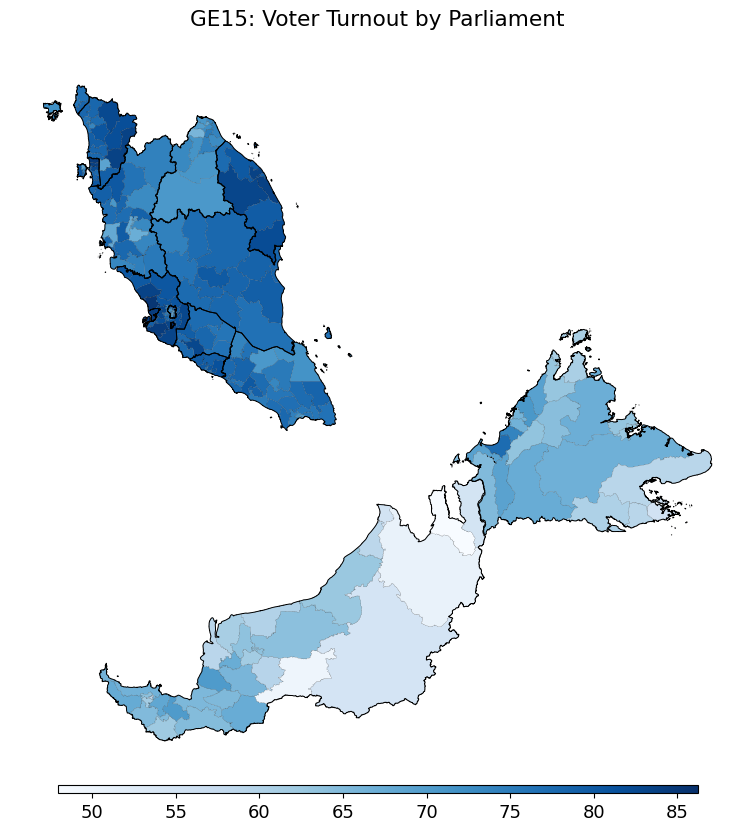

In [37]:
choropleth_gradient(df=geo_o, v='peratus_keluar')